# 딥러닝 기초 1강(2018.08.11)
***  

* __강의 목표__: 수리 기본 및 딥러닝 개념 설명    

* __이론__: 도함수, 경사하강법    

* __실습__: 경사하강법    



***

# 0.요약

1. 도함수    
2. 벡터    
3. 경사하강법    


In [1]:
#기본 옵션
options(repr.plot.width=4, repr.plot.height=3)

# 1. 기본 그래프 그리기

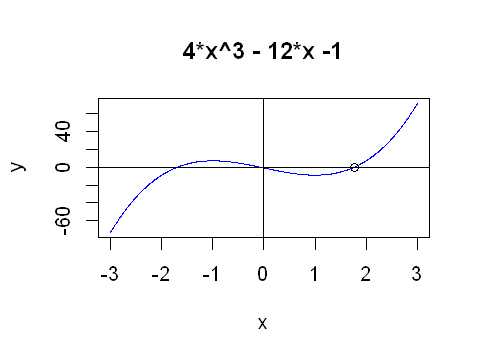

In [2]:
# abline  (a = NULL, b = NULL, h = NULL, v = NULL, ..)    
# https://thebook.io/006723/ch06/03/03/

# R 기초: 함수 그리고, 점 표시하기
eq = function(x){
  4*x^3 - 12*x -1
}

# -3부터 3까지 점을 1000개 뽑기
x <- seq(-3, 3, length.out = 1000)
plot(x, eq(x), type = 'l', col = "Blue", ylab='y', xlab='x', main='4*x^3 - 12*x -1')

# x축, y축 만들기
abline(v = 0, lty="solid")
abline(h = 0, lty="solid")

# y=0인 부분 표시
lines(1.772303, eq(1.772303), type = 'p') 

# 2. 파일 불러오는 방법  
 machine, cost, Gradient
 여기서는 실제 계산이 돌아가지 않고, 그냥 함수만 정의  
 1.  `machine`은 위에서 경사하강법 실행했던`4*x^3 - 12*x -1`과 동일함
 2.  `cost` 는 `(오차 합)^2`의 평균
 3.  `Gradient`는 `w`의 변화량, `b`의 변화량을 `training`으로 실시간 대입해줌  

In [3]:
#파일 불러오기
test_df <- read.csv("data1_1.csv", header = TRUE)

#한글 깨져서 영어로 컬럼 값 바꾸기
colnames(test_df) <- c("score", "wage") 
x <- test_df[,1] #성적
y <- test_df[,2] #임금

print(head(test_df)) # 상위 6개만 출력

       score        wage
1 -2.0186887 -0.35395741
2  0.3488350  0.05626581
3  0.7616395  0.35214978
4 -1.2887162  0.52468914
5  1.4824027  2.31733785
6  0.3851548  1.82964766


# 3. 머신러닝 함수 구조  
 machine, cost, Gradient


In [4]:
#1. Machine: 가장 간단한 형태의 모형, 함수라고 불러도 됨
Machine <- function(x, w, b){
	y_hat <- w * x + b
	return(y_hat)
}

#2. Cost: Cost를 측정해주는 함수를 만들자.
Cost <- function(x, y, w, b){
	y_hat <- Machine(x, w, b) # 위에서 만든 Machine 함수 사용
	loss <- (y - y_hat)^2
	cost <- mean(loss)
	return(cost)
}

#3. Gradient: Computational Graph를 사용하여 Gradient를 정확하게 계산할 수 있다.
Gradient <- function(x, y, w, b){
	y_hat <- Machine(x,w,b)  # 위에서 만든 Machine 함수 사용
	#Gradient를 근사적으로 구할수도 있다. (그러나 느리고, 정확하지 않다.)
	dw <- mean(-2 * x * (y-y_hat)) #(Cost(x, y, w + 0.0001, b) - Cost(x, y, w, b))/0.0001
	db <- mean(-2 * (y-y_hat))     #(Cost(x, y, w, b + 0.0001) - Cost(x, y, w, b))/0.0001 
	grad <- list(dw = dw, db = db) #R의 list 함수가 익숙하지 않다면 사용법을 검색하여 숙지하라.
	return(grad)
}

# 4. 경사하강법  
 error를 줄일 수 있는 방향으로 학습하는 학습법
 
 1.  `machine(모델`은 위에서 경사하강법 실행할 `wx+b`
 2.  `cost` 는 `(오차 합)^2`의 평균
 3.  `Gradient`는 `w`의 변화량, `b`의 변화량을 `training`으로 실시간 대입해줌  
 4. `f(x) = wx + b`의 변수인 `w`, `b`를 찾는 것; `Parametric Approach

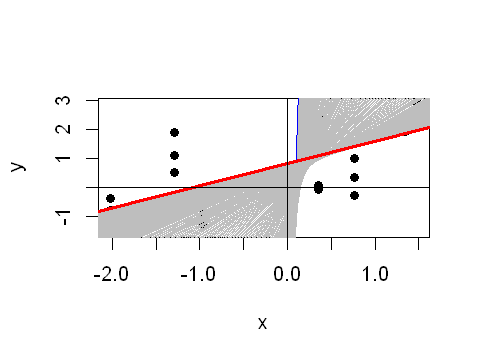

In [5]:
# 1. 초기값 설정
learning_rate <- 0.01 
w <- 100 # 초깃값을 바꾸어 가며 학습을 관찰해보자
b <- -10 
cost_basket <- NULL

#2.  점 그리고
plot(x, y, pch = 19, col = 'black') 

#3. 1000개 그렸을 
for(i in 1:1000){
  grad <- Gradient(x, y, w, b)
  w <- w - learning_rate * grad$dw
  b <- b - learning_rate * grad$db

    if(i==1){
        abline(b, w, lwd = 3, col="blue")
    } else if(i==1000){
        abline(b, w, lwd = 3, col="red") 
    } else{
        abline(b, w, lwd = 0.1, col="grey")
    }
  cost_basket[i] <- Cost(x, y, w, b)
}

# 4. x,y축은 마지막에 놔야지 가장 앞에 배치됨(단그러면 색깔 선들 뒤에 있음)
abline(v = 0, lty="solid") # y축 만들기
abline(h = 0, lty="solid") # x축 만들


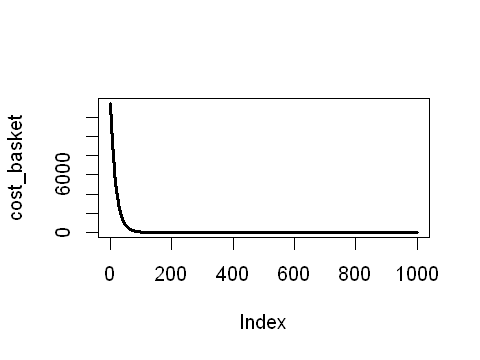

In [6]:
# cost가 줄어드는 추세
plot(cost_basket, type = 'l', lwd = 3)

# 5. 경사하강법 함수 설명
특정 시점에서 cost가 쭉 줄어든다.  
cost는 loss의 평균  
loss는 (기대값 - 실제값)^2 (보통 제곱함)  
기대값은 모델로 돌린것  

1. __모델(machine)__   
`Machine <- function(x, w, b){
	y_hat <- w * x + b
	return(y_hat)
}`  
여기에서 `wx+b`라는 모델을 사용했고, `y_hat`이라는 기대값을 얻어냈음  
    
    
2. __cost__  
`Cost <- function(x, y, w, b){
    y_hat <- Machine(x, w, b) # 위에서 만든 Machine 함수 사용
    loss <- (y - y_hat)^2
    cost <- mean(loss)
    return(cost)
}`

    `y_hat`에 또 `모델`을 넣어서 계산하는데 이게 `학습`  
    `wx+b`니까 `w`랑 `b`를 새롭게 계산줌  
  
    
    
3. __경사하강법__  
`Gradient <- function(x, y, w, b){
	y_hat <- Machine(x,w,b)  # 위에서 만든 Machine 함수 사용
	dw <- mean(-2 * x * (y-y_hat)) 
	db <- mean(-2 * (y-y_hat))  
	grad <- list(dw = dw, db = db)
	return(grad)
}`

`dw`는 w가 변하는 정도, `db`는 b가 변하는 정도, 다음 시간에 도함수로 계산하는 법 배움  



__2강에서 배울 내용__  

`경사하강법` 모델 자세히 설명  
